# Steps to carry out for this projects

1. Introduction
2. Data Collection
3. Process our data
4. Split data
5. Build a model
6. Evaluate the model

# Introduction 

## Overview

1.Description

This project is carried out to create a model that can predict the year 1912 Titanic shipwreck disaster survivals and non-suvivals.

*Note - It's is a binary classification problem

2. Evaluation

Goal is to predict whether or not a passenger survive the ship wreck or not
- if `1` means passenger `survived`
- if `0` means passenger `did't survived`

Score using the `accuracy score`

Submittion process
1. file must be csv
2. 418 enteries plus header role
3. Contains two columns `PassengerId` and `Survived`


### About data

survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

**Target** - `survival`

### More info

**Variable Notes**
* pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower
* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* sibsp: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)
* parch: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.

## Data Exploration (EDA Explanatory Data Analysis)

Analysis data by coming up with possible questions and become one with the data.

1. What questions are we trying to solve?
2. What data do we have and how do we treat different types?
3. What's missing in the data and how do we fit it?
4. Where are the outliers and what should we care about?
5. How to add, change,remove features from the data?

In [1]:
# Import all necessary library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Train data
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Load test data
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Check total num passenger, survival, minors
survivals = (train_data.Survived == 1).sum()
print(f"Total Number of survival: {survivals}")
num_pass = len(train_data)
print(f"Total Number of passenger: {num_pass}")

Total Number of survival: 342
Total Number of passenger: 891


In [5]:
# Find the number of class in the target
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: >

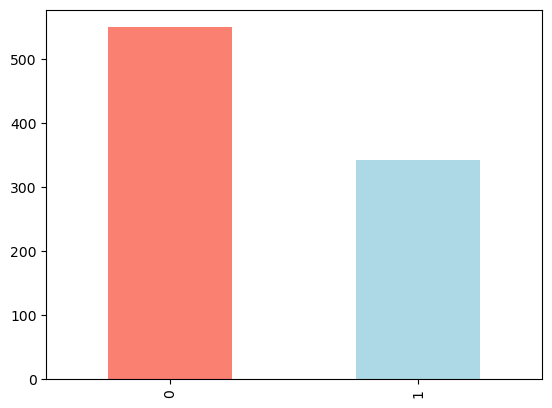

In [6]:
# Visualizing our data
train_data.Survived.value_counts().plot(kind='bar', color=["salmon", "lightblue"])

In [7]:
# Check the dtype of data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# check for missing data
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Describe the data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(train_data.Survived, train_data.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


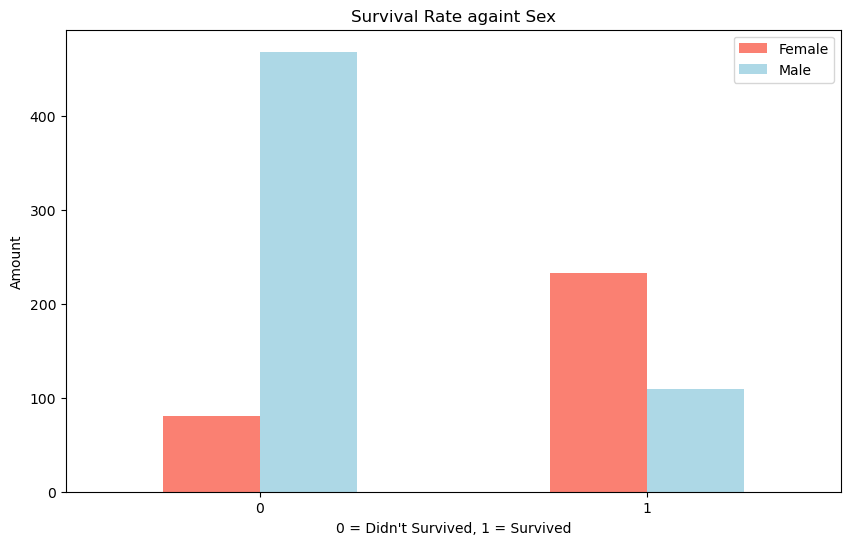

In [12]:
# Create a plot of crosstab
pd.crosstab(train_data.Survived, train_data.Sex).plot(kind="bar",
                                                      figsize=(10, 6),
                                                      color=["salmon", 'lightblue'])
plt.title("Survival Rate againt Sex")
plt.xlabel("0 = Didn't Survived, 1 = Survived")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

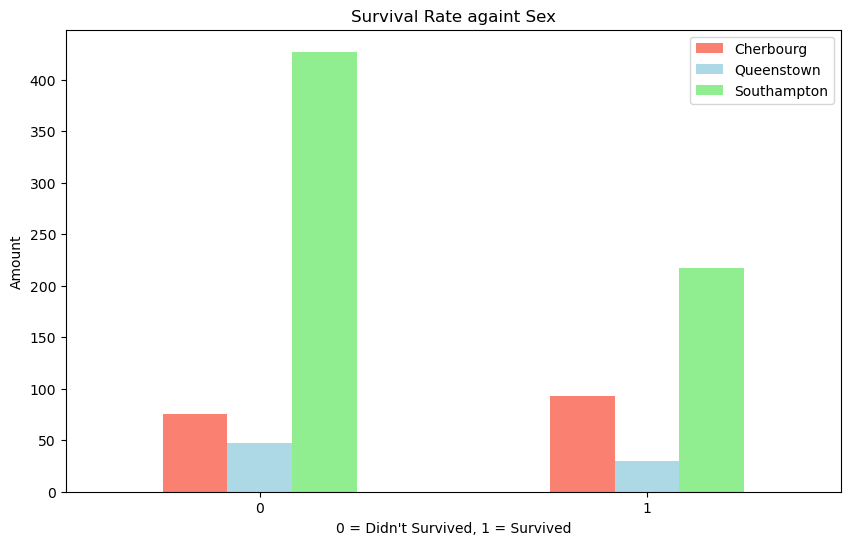

In [13]:
# Create a plot of crosstab
pd.crosstab(train_data.Survived, train_data.Embarked).plot(kind="bar",
                                                           figsize=(10, 6),
                                                           color=["salmon", 'lightblue', 'lightgreen'])
plt.title("Survival Rate againt Sex")
plt.xlabel("0 = Didn't Survived, 1 = Survived")
plt.ylabel("Amount")
plt.legend(["Cherbourg", "Queenstown", "Southampton"])
plt.xticks(rotation=0);

In [14]:
# Check correlation
train_data.corr()

/tmp/ipykernel_24/2875410037.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [15]:
# Fixed the issued with seaborn import error

import numpy as np
def dummy_npwarn_decorator_factory():
  def npwarn_decorator(x):
    return x
  return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)

import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


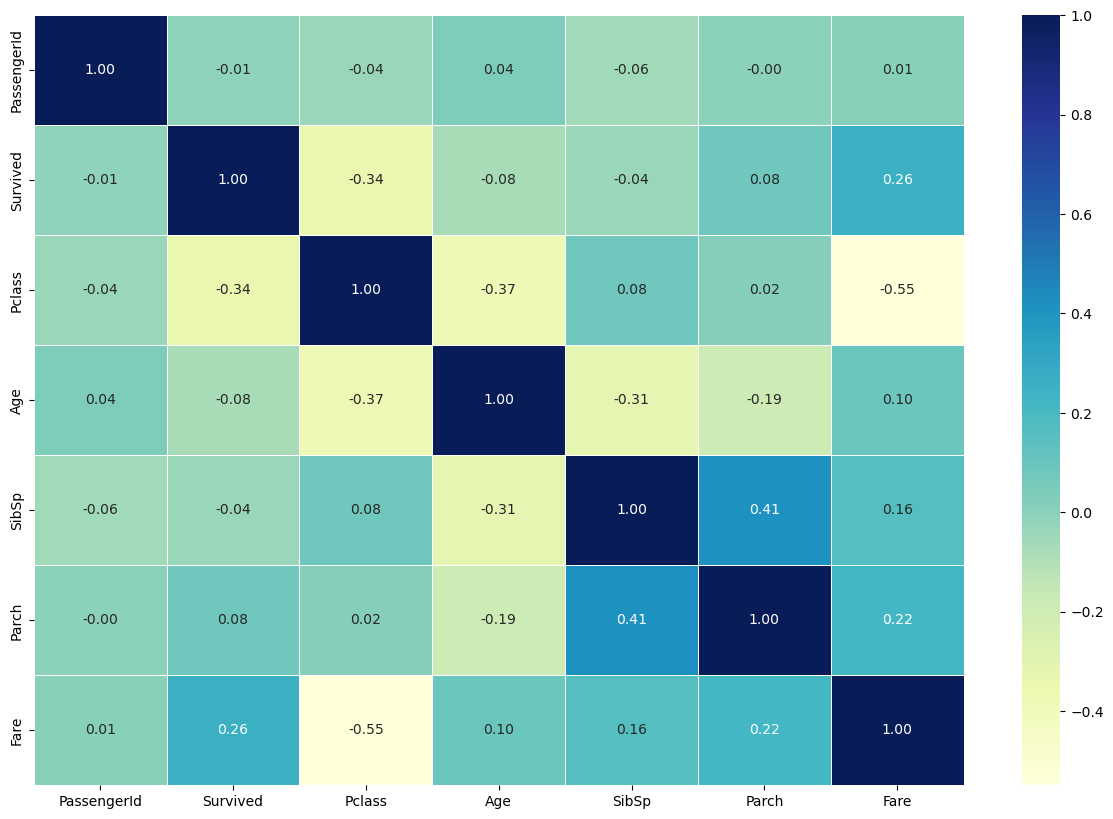

In [16]:
# Import seaborn and view DataFrame using correlation_matrix
import seaborn as sns
corr_matrix = train_data.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [17]:
# Explore a pattern
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [18]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


<Axes: >

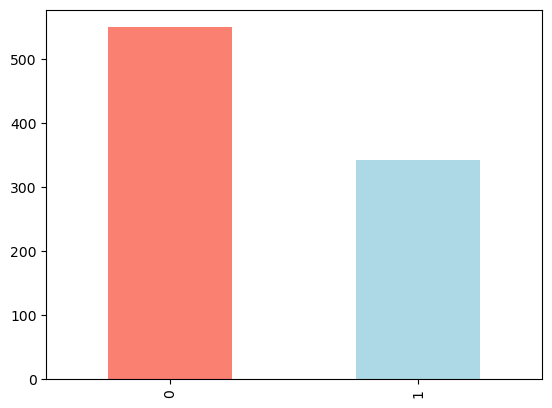

In [19]:
# Visualizing our data
train_data.Survived.value_counts().plot(kind='bar', color=["salmon", "lightblue"])

using random forest classifier to analysis data: for more information on how random forest classifier works. visit this : https://www.upgrad.com/blog/random-forest-classifier/

In [20]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Lets Split data X and y

# Selecting some features that is importance
features = ["Pclass", "Sex", "SibSp", "Parch"]

X = pd.get_dummies(train_data[features])
y = train_data["Survived"]

X.shape, y.shape

((891, 5), (891,))

In [22]:
# Checking for missing data
X.isna().sum()

Pclass        0
SibSp         0
Parch         0
Sex_female    0
Sex_male      0
dtype: int64

In [23]:
# Split data into train_set and valid_set
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
X_train.shape, X_valid.shape

((712, 5), (179, 5))

### Create a multiple estimators to train

In [24]:
# Model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, RocCurveDisplay

In [25]:
# Put into a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score model
def fit_and_score(models, X_train, X_valid, y_train, y_valid):
    """
    Fit and evaluate a machine learning models.
    model : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_valid : valid data(no labels)
    y_train : training labels
    y_valid : valib labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep a model scores
    model_score = {}
    # Loop through the model
    for name, model in models.items():
        # Fit our model
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to the model scores
        model_score[name] = model.score(X_valid, y_valid)
    return model_score

In [26]:
# fit and scoring our model 
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_valid=X_valid,
                             y_train=y_train,
                             y_valid=y_valid)
model_scores

{'Logistic Regression': 0.7877094972067039,
 'KNN': 0.7821229050279329,
 'Random Forest': 0.770949720670391}

Since our models predictions seem below our expectation, let's try 
1. Adding Age to the column and see the effect
2. 

<Axes: >

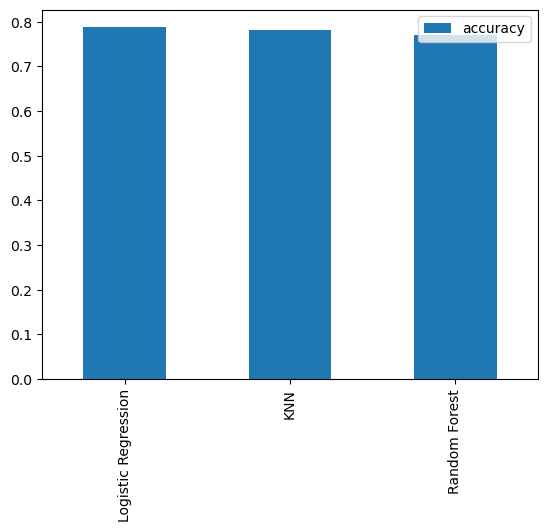

In [27]:
# Compare the difference model
model_comparison = pd.DataFrame(model_scores, index=["accuracy"])
model_comparison.T.plot.bar()

### Adding Age to column and check if the model improved


In [28]:
# check the age column and missing values
train_data["Age"].isna().sum()

177

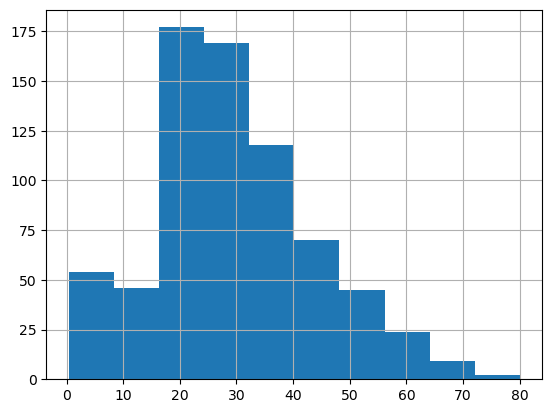

In [29]:
# Visualized 
train_data["Age"].hist();
# Seem that the median will be best option to fill our data.. due to outliers

In [30]:
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)

In [31]:
train_data["Age"].isna().sum(), train_data["Age"].dtype

(0, dtype('float64'))

In [32]:
# Adding X to our data
X["Age"] = train_data["Age"]
X.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Age
0,3,1,0,0,1,22.0
1,1,1,0,1,0,38.0
2,3,0,0,1,0,26.0
3,1,1,0,1,0,35.0
4,3,0,0,0,1,35.0


In [33]:
# Split our data again
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
X_train.shape, X_valid.shape

((712, 6), (179, 6))

In [34]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_valid=X_valid,
                             y_train=y_train,
                             y_valid=y_valid)
model_scores

{'Logistic Regression': 0.8379888268156425,
 'KNN': 0.8212290502793296,
 'Random Forest': 0.7877094972067039}

😂 we got some Improvement.. That's nice

{'Logistic Regression': 0.8379888268156425,
 'KNN': 0.8212290502793296,
 'Random Forest': 0.7877094972067039}

🤔, What else could we do to improve this data? mmmm...
Some people score 1 perfect?
I think i could figure this out too mmm...

Looking at our data and try some Basic Feature Engineering principle: example here https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

Beautiful

## Feature Engineering 

In [35]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
# Importing strings
# !pip install strings

In [37]:
import string

In [38]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if substring in big_string:
            return substring
    print(big_string)
    return np.nan

In [39]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev', 'Dr', 'Ms', 'Mile', 'Col', 'Capt', 'Capt', 'Mme', 
            'Countess', 'Don', 'Jonkheer']

In [40]:
train_data["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [41]:
# Create column for Title and pass substring to it
train_data['Title']=train_data['Name'].map(lambda x: substrings_in_string(x, title_list))

Sagesser, Mlle. Emma


In [42]:
# replace all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mile', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=="Male":
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [43]:
train_data['Title']=train_data.apply(replace_titles, axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [44]:
train_data.Cabin.isna().sum()

687

In [45]:
#Creating new family_size column
train_data['Family_Size']=train_data['SibSp']+train_data['Parch']
train_data['Family_Size'].head()

0    1
1    1
2    0
3    1
4    0
Name: Family_Size, dtype: int64

In [46]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [47]:
# Fill missing value with unknown
train_data["Cabin"].replace(np.nan, "Unknown", inplace=True)

In [48]:
# Turning cabin number into Deck
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
train_data['Deck'] = train_data["Cabin"].map(lambda x: substrings_in_string(x, cabin_list))

In [49]:
# Age*Class
train_data['Age*Class']=train_data['Age']*train_data['Pclass']
train_data['Age*Class'].head()

0     66.0
1     38.0
2     78.0
3     35.0
4    105.0
Name: Age*Class, dtype: float64

In [50]:
# Fare per person
train_data['Fare_Per_Person']=train_data['Fare']/(train_data['Family_Size']+1)
train_data['Fare_Per_Person'].head()

0     3.62500
1    35.64165
2     7.92500
3    26.55000
4     8.05000
Name: Fare_Per_Person, dtype: float64

In [51]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Deck,Age*Class,Fare_Per_Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr,1,Unknown,66.0,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,C,38.0,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,0,Unknown,78.0,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,C,35.0,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr,0,Unknown,105.0,8.05000


In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              891 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            891 non-null    object 
 11  Embarked         889 non-null    object 
 12  Title            890 non-null    object 
 13  Family_Size      891 non-null    int64  
 14  Deck             891 non-null    object 
 15  Age*Class        891 non-null    float64
 16  Fare_Per_Person  891 non-null    float64
dtypes: float64(4), i

### Testing New Features

In [53]:
train_data.shape

(891, 17)

In [54]:
# Create X and y
features = ["Pclass", "Sex", "SibSp", "Parch", "Title", "Embarked", "Deck"]
X = pd.get_dummies(train_data[features])
X.head()
y = train_data["Survived"]

# Add other numeric data
X["Age"] = train_data["Age"]
X["Family_Size"] = train_data["Family_Size"]
X["Age*Class"] = train_data["Age*Class"]
X["Fare_Per_Person"] = train_data["Fare_Per_Person"]
X["Fare"] = train_data["Fare"]
X.head()                               

,Pclass,SibSp,Parch,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Embarked_C,...,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown,Age,Family_Size,Age*Class,Fare_Per_Person,Fare
0,3,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,22.0,1,66.0,3.62500,7.2500
1,1,1,0,1,0,0,0,0,1,1,...,0,0,0,0,0,38.0,1,38.0,35.64165,71.2833
2,3,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,26.0,0,78.0,7.92500,7.9250
3,1,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,35.0,1,35.0,26.55000,53.1000
4,3,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,35.0,0,105.0,8.05000,8.0500


In [55]:
X.shape

(891, 26)

In [56]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["Pclass","Age", "Age*Class", "Fare_Per_Person", "Fare"]), # get all values between 0 and 1
    remainder="passthrough",
)

In [57]:
# Fit the transformer
ct.fit(X)
# Tranformer X with Normaization
X_normal = ct.transform(X)
X_normal

array([[1.        , 0.27117366, 0.29437308, ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.4722292 , 0.16772209, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.32143755, 0.34865207, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.34656949, 0.37579157, ..., 0.        , 1.        ,
        3.        ],
       [0.        , 0.32143755, 0.1134431 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.39683338, 0.43007056, ..., 0.        , 1.        ,
        0.        ]])

In [58]:
X_normal.shape, X.shape

((891, 26), (891, 26))

In [59]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [60]:
X.isna().sum()

Pclass             0
SibSp              0
Parch              0
Sex_female         0
Sex_male           0
Title_Master       0
Title_Miss         0
Title_Mr           0
Title_Mrs          0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
Deck_A             0
Deck_B             0
Deck_C             0
Deck_D             0
Deck_E             0
Deck_F             0
Deck_G             0
Deck_T             0
Deck_Unknown       0
Age                0
Family_Size        0
Age*Class          0
Fare_Per_Person    0
Fare               0
dtype: int64

Now our data is ready, what is Next?
Split our new data into X_train, X_valid, y_train, y_valid

In [61]:
# Split data into X_train, X_valid
X_train, X_valid, y_train, y_valid = train_test_split(X_normal, y, test_size=0.2,)
X_train.shape, X_valid.shape

((712, 26), (179, 26))

In [62]:
# Let train our model on our new data...
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_valid=X_valid,
                             y_train=y_train,
                             y_valid=y_valid)
model_scores

{'Logistic Regression': 0.8547486033519553,
 'KNN': 0.8044692737430168,
 'Random Forest': 0.8044692737430168}

mmm... interesting..  model seem to improve with `logistic Regression` by more than `9%` more: let compare the different performers in the model. Since our model really improve with logistic regression i can now best for best parameters by fine turning my model. to see it, what's happen

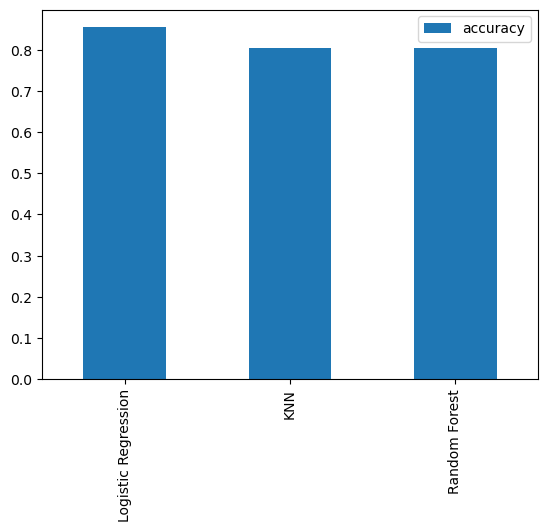

In [63]:
# Compare the difference model
model_comparison = pd.DataFrame(model_scores, index=["accuracy"])
model_comparison.T.plot.bar();

### Hyperparameter tunning with RandomdimedSearchCV and GridSearchCV

In [64]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using `RandomizedSearchCV`

In [65]:
# Tune Logistic Regression

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [66]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [67]:
rs_log_reg.score(X_valid, y_valid)

0.8547486033519553

let's do the same for RandomForestClassifier()...

In [68]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)


# Fit randn hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [69]:
rs_rf.best_params_

{'n_estimators': 760,
 'min_samples_split': 16,
 'min_samples_leaf': 5,
 'max_depth': 10}

In [70]:
rs_rf.score(X_valid, y_valid)

0.8715083798882681

### Hyperparameter Tuning with GridSearchCV
Since our LogisticRegression model provides the best score so far, let's try imprpved it GridSearchCV... 

In [71]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [72]:
# Checking the best hyperparameter
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [73]:
gs_log_reg.score(X_valid, y_valid)

0.8491620111731844

In [74]:
# Let create a Logistic Regression model 
model_lg = LogisticRegression()

# Fit the model
model_lg.fit(X_train, y_train)

LogisticRegression()

In [75]:
# Check the score of our model
model_lg.score(X_valid, y_valid)

0.8547486033519553

In [76]:
# Evaluate the model
y_preds =model_lg.predict(X_valid)
y_preds

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1])

In [77]:
y_valid

789    0
497    0
139    0
570    1
66     1
      ..
767    0
165    1
552    0
439    0
65     1
Name: Survived, Length: 179, dtype: int64

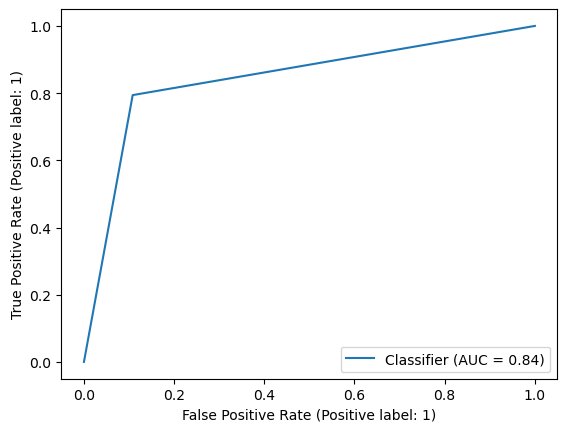

In [78]:
RocCurveDisplay.from_predictions(y_valid, y_preds);

In [79]:
# Confusion matrix
print(confusion_matrix(y_valid, y_preds))

[[99 12]
 [14 54]]


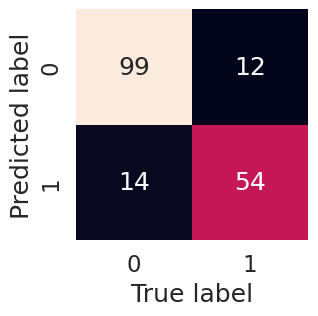

In [80]:
# Font size was changed to font_scale and sns.set was changed to sns.set_theme
sns.set_theme(font_scale=1.5)

def plot_conf_mat(y_valid, y_preds):
    """
    PLots a nice looking confusion matrix using Seaborns's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_valid, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_valid, y_preds)

## Performing on Test_data

In [81]:
# Let perform on our test data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [82]:
# Fill missing age data with median
test_data["Age"].fillna(test_data["Age"].median(), inplace=True)

In [83]:
# Split Names into Titles
test_data['Title']=test_data['Name'].map(lambda x: substrings_in_string(x, title_list))

In [84]:
test_data['Title']=test_data.apply(replace_titles, axis=1)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [85]:
#Creating new family_size column
test_data['Family_Size']=test_data['SibSp']+test_data['Parch']
test_data['Family_Size'].head()

0    0
1    1
2    0
3    0
4    2
Name: Family_Size, dtype: int64

In [86]:
# Age*Class
test_data['Age*Class']=test_data['Age']*test_data['Pclass']
test_data['Age*Class'].head()

0    103.5
1    141.0
2    124.0
3     81.0
4     66.0
Name: Age*Class, dtype: float64

In [87]:
# Fare per person
test_data['Fare_Per_Person']=test_data['Fare']/(test_data['Family_Size']+1)
test_data['Fare_Per_Person'].head()

0    7.829200
1    3.500000
2    9.687500
3    8.662500
4    4.095833
Name: Fare_Per_Person, dtype: float64

In [88]:
test_data["Fare_Per_Person"].fillna(test_data["Fare_Per_Person"].median(), inplace=True)

In [89]:
test_data["Cabin"].replace(np.nan, "Unknown", inplace=True)

In [90]:
# Turning cabin number into Deck
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
test_data['Deck'] = test_data["Cabin"].map(lambda x: substrings_in_string(x, cabin_list))

In [91]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Age*Class,Fare_Per_Person,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q,Mr,0,103.5,7.829200,Unknown
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S,Mrs,1,141.0,3.500000,Unknown
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q,Mr,0,124.0,9.687500,Unknown
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S,Mr,0,81.0,8.662500,Unknown
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S,Mrs,2,66.0,4.095833,Unknown


In [92]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Title", "Embarked", "Deck"]
X_test = pd.get_dummies(test_data[features])
X_test.head()

# Add other numeric data
X_test["Age"] = test_data["Age"]
X_test["Family_Size"] = test_data["Family_Size"]
X_test["Age*Class"] = test_data["Age*Class"]
X_test["Fare_Per_Person"] = test_data["Fare_Per_Person"]
X_test["Fare"] = test_data["Fare"]
X_test.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Embarked_C,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Unknown,Age,Family_Size,Age*Class,Fare_Per_Person,Fare
0,3,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,34.5,0,103.5,7.829200,7.8292
1,3,1,0,1,0,0,0,0,1,0,...,0,0,0,0,1,47.0,1,141.0,3.500000,7.0000
2,2,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,62.0,0,124.0,9.687500,9.6875
3,3,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,27.0,0,81.0,8.662500,8.6625
4,3,1,1,1,0,0,0,0,1,0,...,0,0,0,0,1,22.0,2,66.0,4.095833,12.2875


In [93]:
print(X_test.info())
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           418 non-null    int64  
 1   SibSp            418 non-null    int64  
 2   Parch            418 non-null    int64  
 3   Sex_female       418 non-null    uint8  
 4   Sex_male         418 non-null    uint8  
 5   Title_Master     418 non-null    uint8  
 6   Title_Miss       418 non-null    uint8  
 7   Title_Mr         418 non-null    uint8  
 8   Title_Mrs        418 non-null    uint8  
 9   Embarked_C       418 non-null    uint8  
 10  Embarked_Q       418 non-null    uint8  
 11  Embarked_S       418 non-null    uint8  
 12  Deck_A           418 non-null    uint8  
 13  Deck_B           418 non-null    uint8  
 14  Deck_C           418 non-null    uint8  
 15  Deck_D           418 non-null    uint8  
 16  Deck_E           418 non-null    uint8  
 17  Deck_F          

**Note** Since Deck_T is missing in out data column. Let's Add it.

In [94]:
# Create Deck_T with all values set to Zero

X_test['Deck_T'] = 0
X_test['Deck_T'].head()

0    0
1    0
2    0
3    0
4    0
Name: Deck_T, dtype: int64

In [95]:
X_test.shape

(418, 26)

In [96]:
X_test.isna().sum()

Pclass             0
SibSp              0
Parch              0
Sex_female         0
Sex_male           0
Title_Master       0
Title_Miss         0
Title_Mr           0
Title_Mrs          0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
Deck_A             0
Deck_B             0
Deck_C             0
Deck_D             0
Deck_E             0
Deck_F             0
Deck_G             0
Deck_Unknown       0
Age                0
Family_Size        0
Age*Class          0
Fare_Per_Person    0
Fare               1
Deck_T             0
dtype: int64

Since we have on missing data in fare, let's fill with median.

In [97]:
X_test["Fare"].fillna(X_test["Fare"].median(), inplace=True)

In [98]:
# Make Predictions
predictions = model_lg.predict(X_test)
predictions

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Exporting our data


In [99]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved")

Your submission was successfully saved
